In [1]:
import requests
from lxml import etree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

In [8]:
# 网站以及请求头信息
url1 = 'https://nba.hupu.com/stats/players/pts'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 \
            (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
# 请求数据
request1 = requests.get(url1,headers=headers)

In [9]:
nba1_etree = etree.HTML(request1.content)
# 解析并写入文件
result = nba1_etree.xpath('/html/body/div/div/div/table/tbody/tr/td/text()')  # 球员数据
result2 = nba1_etree.xpath('/html/body/div/div/div/table/tbody/tr/td/a/text()')  # 球员姓名和球队
# 保存数据
with open('nba.csv','w') as f:  # 将球员数据保存到nba.csv中
    m = 1
    for i in result[12:]:
        f.write(i)
        m += 1
        if m < 11:
            f.write(',')
        else:
            f.write('\n')
            m = 1

with open('nba_name.csv','w') as f:  # 将球员及球队保存到nba_name.csv中
    m = 1
    for i in result2:
        f.write(i)
        m += 1
        if m < 3:
            f.write(',')
        else:
            f.write('\n')
            m = 1

In [2]:
# 合并两个表的数据
data = pd.read_csv('nba.csv',header=None)
name = pd.read_csv('nba_name.csv',header=None)
all = pd.concat([name,data],axis=1)
all.head()

,0,1,0,1,2,3,4,5,6,7,8,9
0,扬尼斯-阿德托昆博,雄鹿,1,32.4,12.70-21.00,60.6%,0.20-0.70,22.2%,6.80-11.40,60.3%,26,35.1
1,谢伊-吉尔杰斯-亚历山大,雷霆,2,31.2,11.00-21.00,52.5%,2.20-6.00,35.6%,7.00-7.90,88.5%,34,34.4
2,尼古拉-约基奇,掘金,3,31.0,11.80-21.30,55.3%,2.30-4.70,47.9%,5.20-6.50,80.5%,30,36.9
3,杰森-塔特姆,凯尔特人,4,28.2,9.40-20.20,46.4%,3.90-10.70,37%,5.50-6.90,79.6%,32,36.3
4,达龙-福克斯,国王,5,26.7,9.90-20.30,48.6%,2.00-6.30,32.1%,4.90-6.10,80.8%,35,37.3


In [3]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     object 
 1   1       50 non-null     object 
 2   0       50 non-null     int64  
 3   1       50 non-null     float64
 4   2       50 non-null     object 
 5   3       50 non-null     object 
 6   4       50 non-null     object 
 7   5       50 non-null     object 
 8   6       50 non-null     object 
 9   7       50 non-null     object 
 10  8       50 non-null     int64  
 11  9       50 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ KB


In [4]:
# 修改列名称
columns_n = ['姓名','球队','排名','得分','命中-出手','命中率','命中-三分','三分命中率','命中-罚球','罚球命中率','场次','上场时间']
all.columns = columns_n
# 数据清洗
all['命中率'] = all['命中率'].str.replace('%','').astype(float) / 100
all['三分命中率'] = all['三分命中率'].str.replace('%','').astype(float) / 100
all['罚球命中率'] = all['罚球命中率'].str.replace('%','').astype(float) / 100
# 将清洗好的数据保存在nba_all.csv中
all.to_csv('nba_all.csv', index=False)

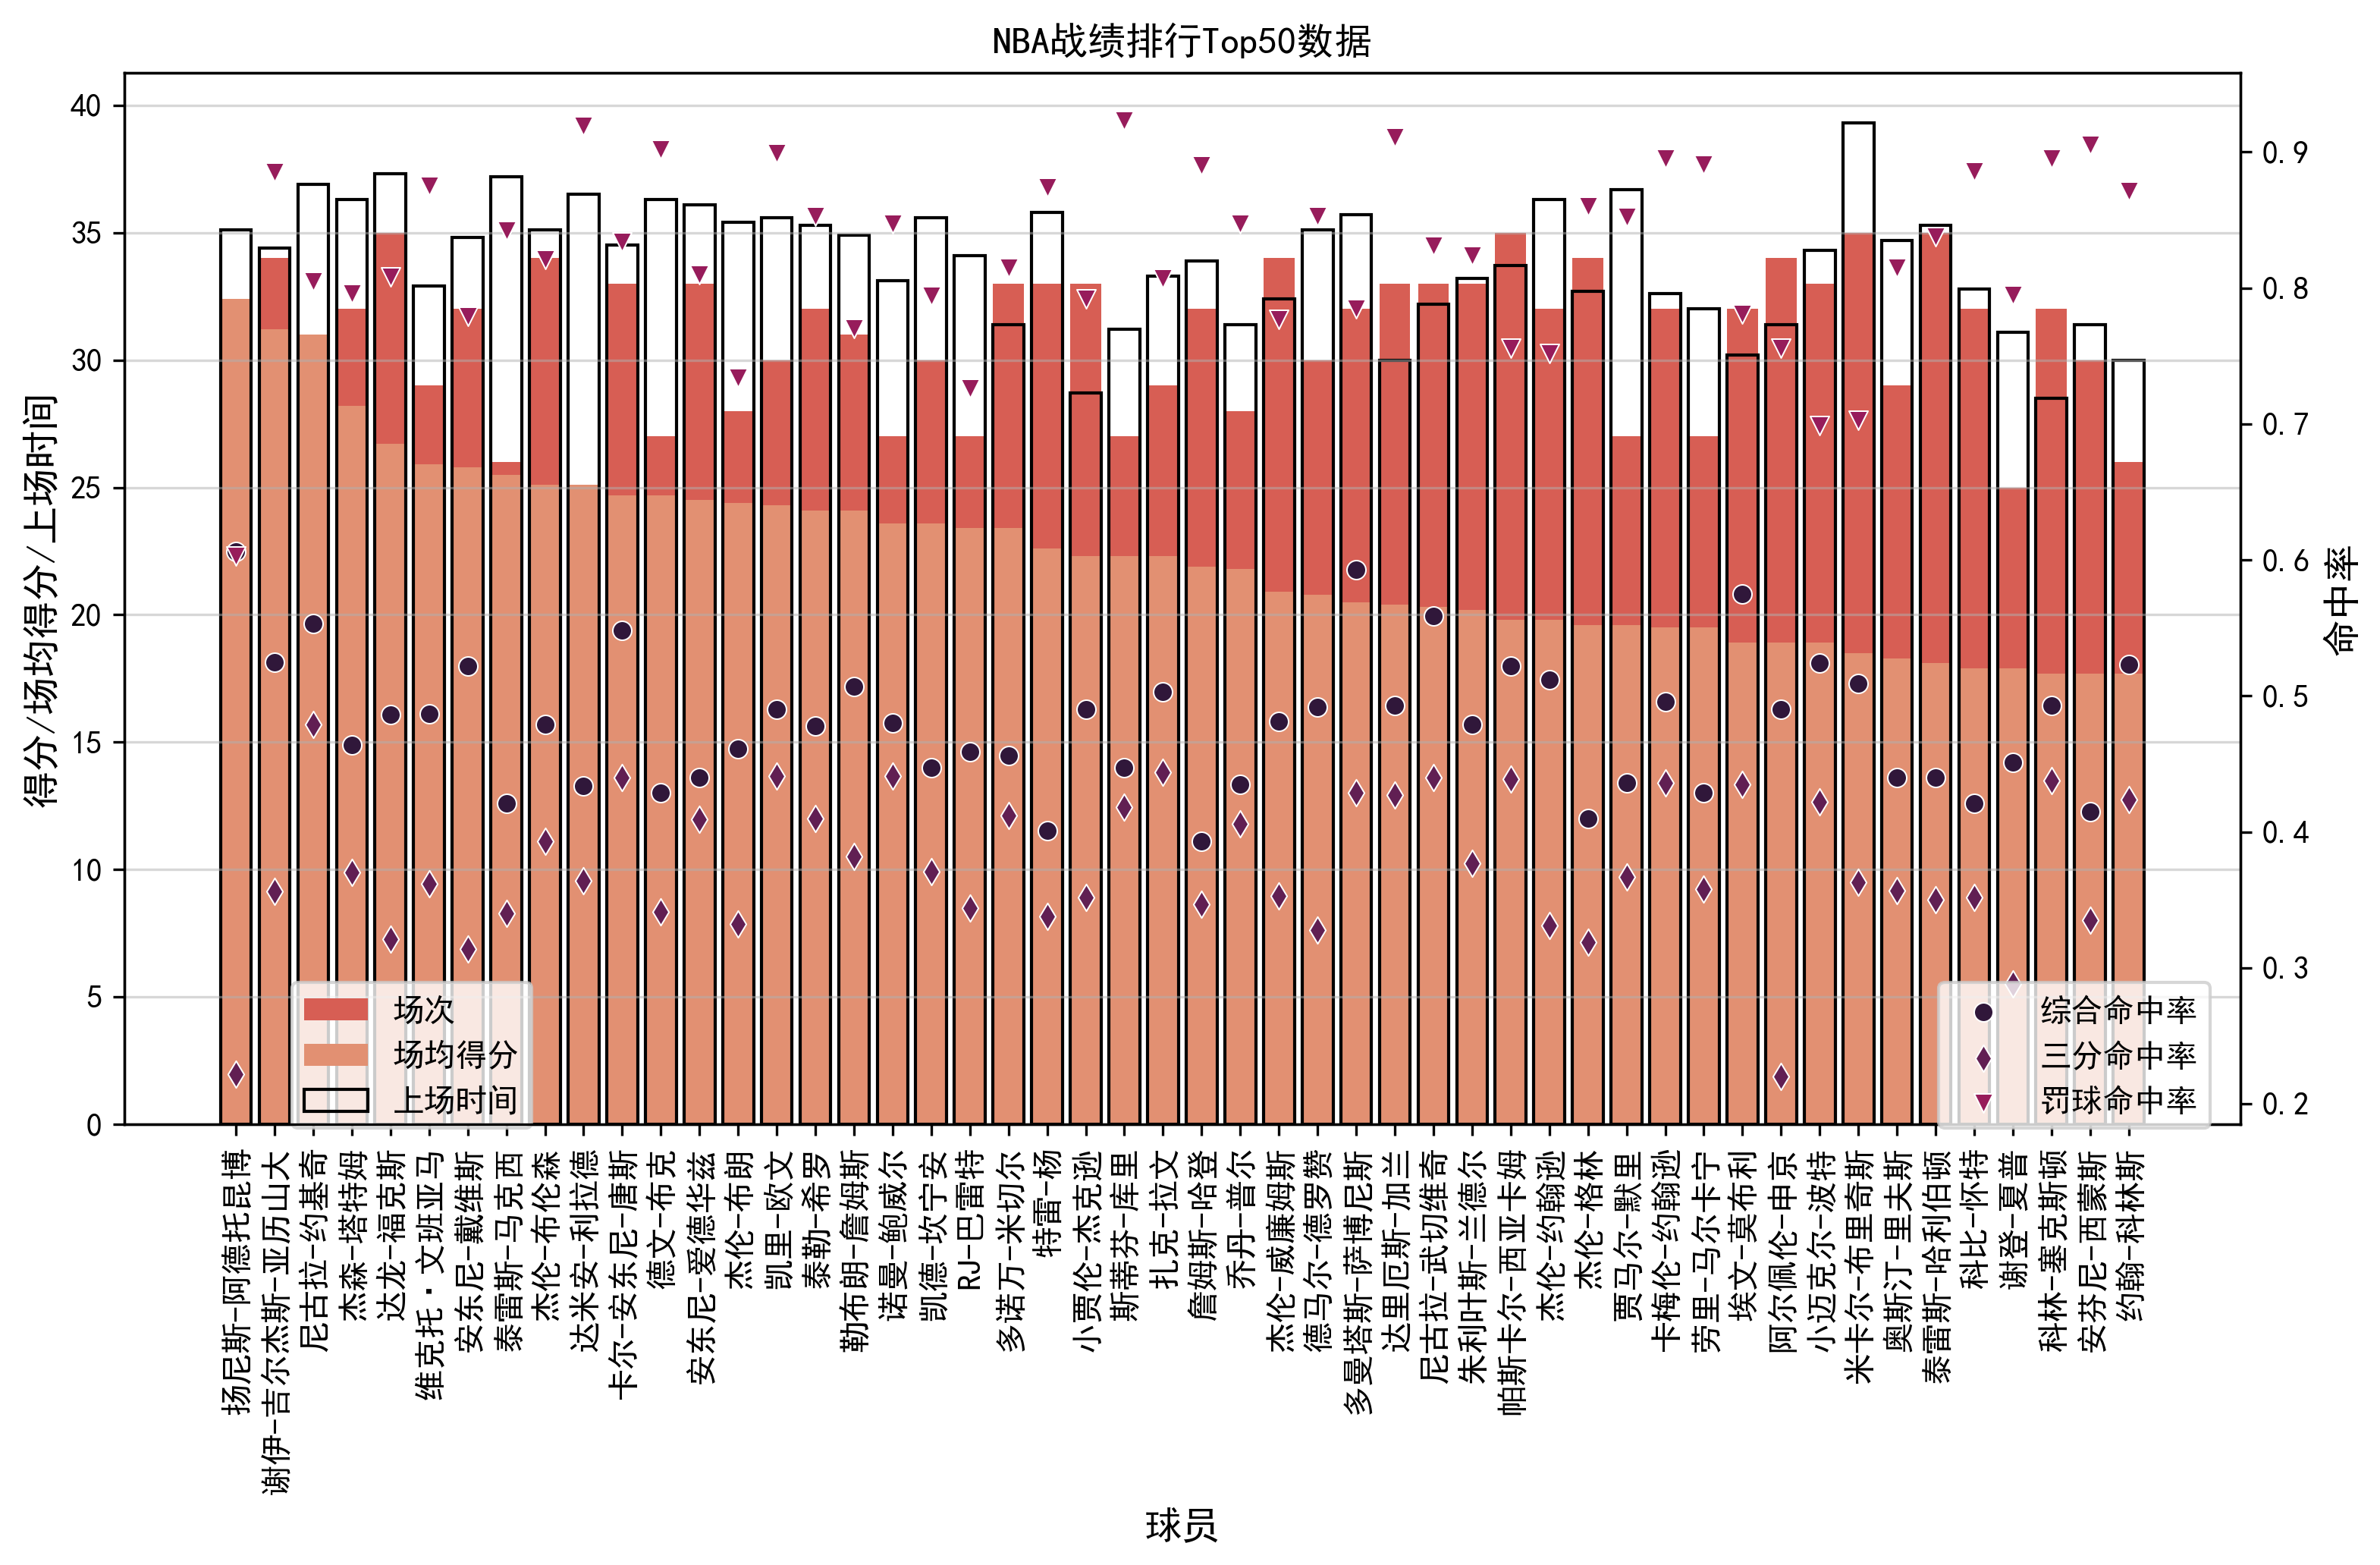

In [12]:
# 数据可视化
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)
plt.title('NBA战绩排行Top50数据')
plt.xticks(rotation=90)
plt.grid(True,axis='both', alpha=0.5)
color = sns.color_palette('rocket',n_colors=7)

# 绘制第一个画布
sns.barplot(x='姓名', y='场次', data=all, ax=ax1, color=color[4], label='场次')
sns.barplot(x='姓名', y='得分', data=all, ax=ax1, color=color[5], label='场均得分')
sns.barplot(x='姓名', y='上场时间', data=all, ax=ax1, color=color[6], fill=False, label='上场时间')
ax1.set_ylabel('得分/场均得分/上场时间',size=12)
ax1.set_xlabel('球员',size=12)

ax1.legend(bbox_to_anchor=(0.2,0.15))

# 绘制第二个画布
ax2 = ax1.twinx()
sns.scatterplot(x='姓名', y='命中率', 
             data=all, ax=ax2, 
             color=color[0], marker='o',
             label='综合命中率')
sns.scatterplot(x='姓名', y='三分命中率', 
             data=all, ax=ax2, 
             color=color[1],  marker='d',
             label='三分命中率')
sns.scatterplot(x='姓名', y='罚球命中率', 
             data=all, ax=ax2, 
             color=color[2],  marker='v',
             label='罚球命中率')


ax2.set_ylabel('命中率',size=12)
ax2.legend(loc='upper left', bbox_to_anchor=(0.85,0.15))
